## Exercise 2.3

In this exercise you will perform simple spectral analysis of signals.

Open WAVE files containing signals $s_1$, $s_2$, $s_4$, $s_n$ *from exercise 1.3*. You will also be given speech file *speech_sample.wav* containing signal $s_5$. Compute and plot magnitude and phase spectrums of each signal (use FFT size $N=f_s$ so that you’ll analyze 1 sec of a signal). What can you say about the magnitude spectrum of signal $s_4$? Is frequency $f_3$ present there? Explain your results

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

%matplotlib inline

In [2]:
fs1, s1 = wav.read('signal.wav')
fs2, s2 = wav.read('signal_noisy.wav')
fsn, sn = wav.read('noise.wav')
fs4, s4 = wav.read('resampled.wav')
fs5, s5 = wav.read('speech_sample.wav')

def plot_signal_and_spectrum(s, fs):
    plt.subplots(1, 2, figsize=(10, 2))

    plt.subplot(121)
    plt.plot(s)
    plt.xlabel("Time [sec]")
    plt.ylabel("Magnitude")
    plt.ylim([-1.5, 1.5])
    plt.grid()

    # spectrum of s (fs samples taken)
    # plot only the 1st half of spectrum (since it's symmetric)
    plt.subplot(122)

    spec = np.abs(np.fft.fft(s, fs))

    plt.xlabel("Freq [Hz]")
    plt.ylabel("Magnitude")
    plt.xlim(0, fs // 2)
    plt.plot(spec[:fs//2])
    plt.grid()


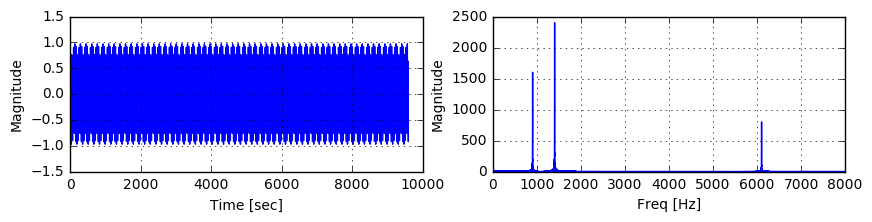

In [3]:
# normalize samples by 32768 (optional)
s1 = np.divide(s1, 2 ** 15)

plot_signal_and_spectrum(s1, fs1)


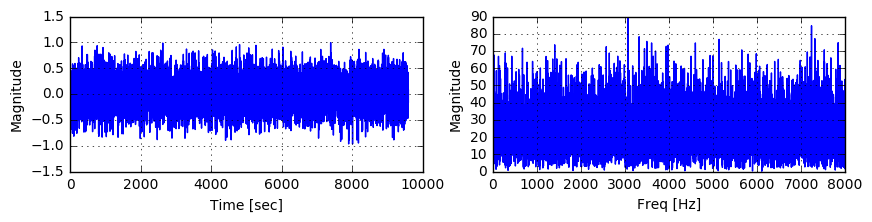

In [4]:
sn = np.divide(sn, 2 ** 15)

plot_signal_and_spectrum(sn, fsn)


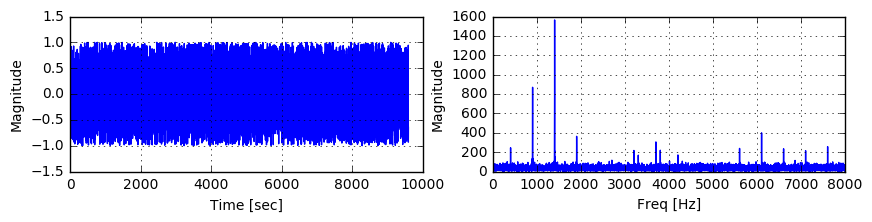

In [5]:
s2 = np.divide(s2, 2 ** 15)

plot_signal_and_spectrum(s2, fs2)


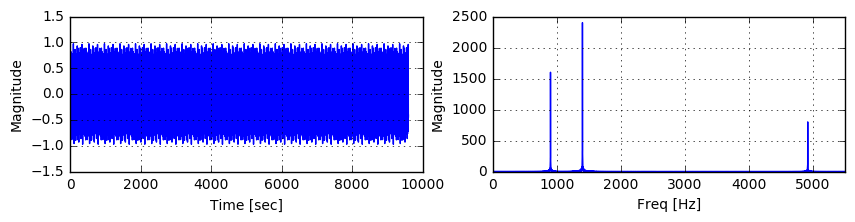

In [6]:
s4 = np.divide(s4, 2 ** 15)

plot_signal_and_spectrum(s4, fs4)


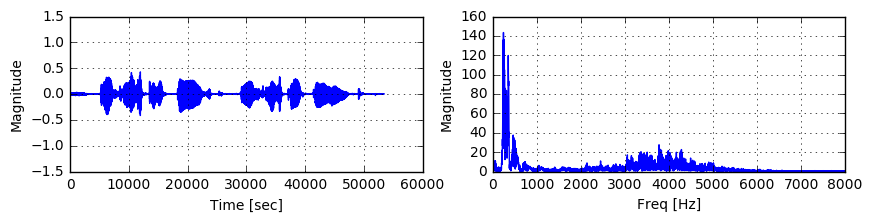

In [7]:
# finally let's take a look at ordinary speech signal:

s5 = np.divide(s5, 2 ** 15)

plot_signal_and_spectrum(s5, fs5)


Perform the Inverse FFT. Plot your results. Compare obtained signal with source signal

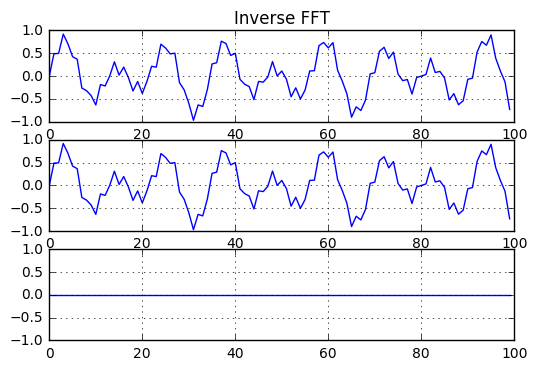

In [8]:
# inverse fft; compare s1 with the result of ifft of s1 spectrum

spectrum = np.fft.fft(s1, fs1)
ifft_s1 = np.real(np.fft.ifft(spectrum, fs1))

plt.subplot(311, title='Inverse FFT')
plt.plot(ifft_s1[:100])
plt.grid()

plt.subplot(312)
plt.plot(s1[:100])
plt.grid()

plt.subplot(313)
plt.ylim(-1, 1)
plt.plot(s1[:100] - ifft_s1[:100])
plt.grid()


Plot the spectrogram of each signal

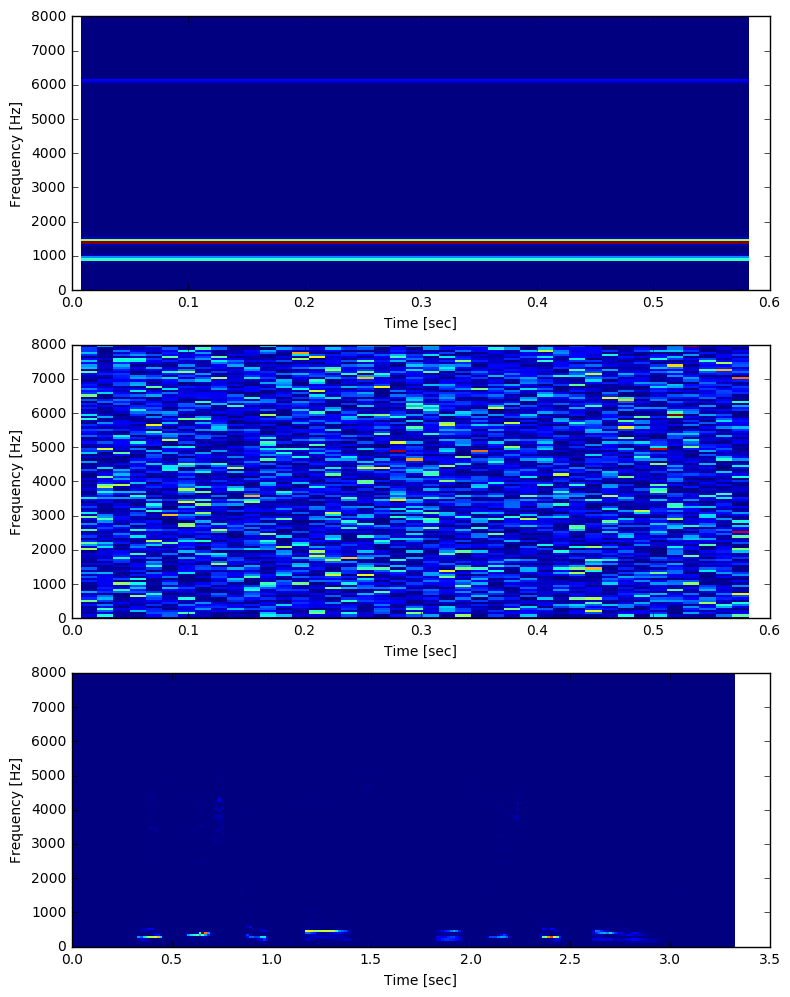

In [9]:
plt.subplots(3, 1, figsize=(9, 12))

plt.subplot(311)
f, t, Sxx = sig.spectrogram(s1, fs1)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(312)
f, t, Sxx = sig.spectrogram(sn, fsn)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(313)
f, t, Sxx = sig.spectrogram(s5, fs5)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
